# **Colab Configuration**

In [1]:
# Colab connection with drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Import Library**

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.15.0


In [3]:
# Import some basics library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Import Dataset**

In [4]:
dataset = pd.read_csv('drive/MyDrive/Deep Learning2/Datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Devide the dataset into independent and dependent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# **Feature Engineering**

In [8]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'], dtype=int, drop_first=True)
gender = pd.get_dummies(X['Gender'], dtype=int, drop_first=True)

In [9]:
# Concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.concat([X, geography, gender], axis = 1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# **Splitting Dataset**

In [13]:
# Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# **Feature Scaling**

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
X_test.shape

(2000, 11)

# **Create the ANN Model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [37]:
# Initialize the ANN
classifier = Sequential()

In [38]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [39]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [40]:
# Adding the secoond hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [41]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [42]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [43]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [45]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4808 - accuracy: 0.7960 - val_loss: 0.4185 - val_accuracy: 0.8133
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4327 - accuracy: 0.8099 - val_loss: 0.4071 - val_accuracy: 0.8148
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4212 - accuracy: 0.8184 - val_loss: 0.4016 - val_accuracy: 0.8247
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4081 - accuracy: 0.8298 - val_loss: 0.3813 - val_accuracy: 0.8376
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3980 - accuracy: 0.8306 - val_loss: 0.3719 - val_accuracy: 0.8497
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3972 - accuracy: 0.8343 - val_loss: 0.3619 - val_accuracy: 0.8504
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3857 - accuracy: 0.8386 - val_loss: 0.3763 - val_accuracy:

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

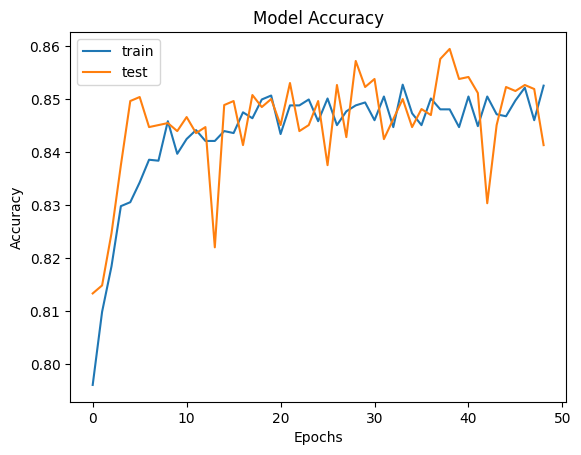

In [47]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

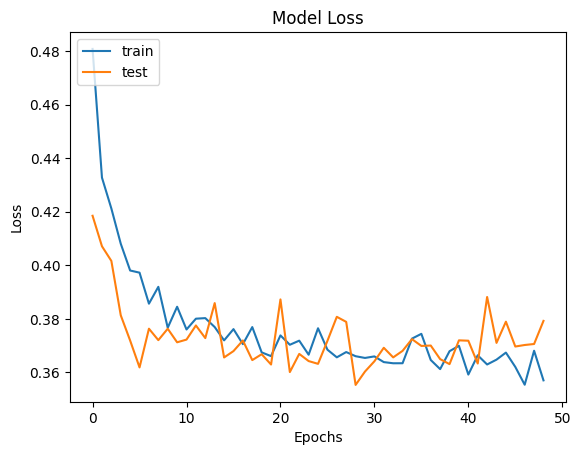

In [48]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Prediction and Evaluate the Model**

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [50]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1586,    9],
       [ 298,  107]])

In [51]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [52]:
score

0.8465

In [53]:
# Get the Weights
classifier.get_weights()

[array([[ 0.42130023, -0.44718486, -0.24066383,  0.0259633 , -0.13132338,
         -0.5921969 ,  1.1567734 , -0.12069536, -0.66496104,  0.5197077 ,
         -0.08641524],
        [-2.3524766 , -0.65503436,  1.76866   ,  0.81438226,  2.9199426 ,
         -3.14763   ,  0.93674904,  0.2832747 , -3.3751001 , -0.7417498 ,
          2.9225743 ],
        [ 1.5874665 ,  0.4886185 , -0.8473595 , -0.05920541,  0.38191035,
         -0.15985511,  0.02589788,  0.4378499 , -0.79252714, -0.30651164,
         -0.15686561],
        [-1.5436492 , -3.107587  , -0.00570853,  0.6935008 , -0.33617777,
         -0.90740925, -1.9908398 , -3.9246898 , -1.1293353 , -1.5538195 ,
          0.83807254],
        [-0.24450895, -0.8153153 , -3.1195662 ,  3.7183547 , -0.54828525,
          0.11798898,  0.46858144, -3.8662868 , -0.653397  , -0.2063262 ,
         -1.6656448 ],
        [-1.0285115 , -0.29870293,  0.48573214, -0.14569516, -0.4408072 ,
         -0.98240054, -0.65551776, -0.4141536 ,  0.4590636 ,  1.2974734